Author: Rajasundaram Mathiazhagan

# CREATING A RANDOM MAP 

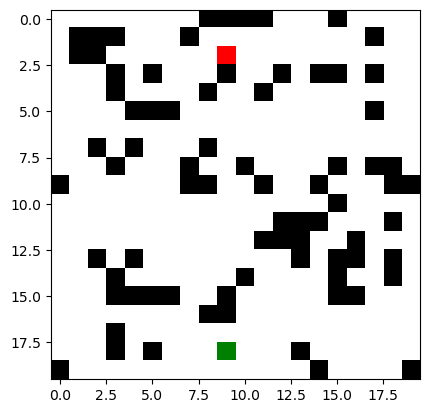

In [1]:
#creating a random map with start cell, end cell and cell blocks(obstacles)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random as rd
import copy

size=20 # EDIT THIS VALUE TO CHANGE THE SIZE OF THE MAP
obstacle_density = 0.2 #EDIT THIS VALUE (0 to 1) TO CHANGE THE DENSITY OF OBSTACLES 

GRID = np.zeros([size,size]) 
cmap = colors.ListedColormap(['white','black','green','red','blue','Grey']) #color code for plotting the grid 
bounds=[0,1,2,3,4,5,6] #bounds for color map

#start cell
start_x=int(np.floor((rd.random())*size))
start_y=int(np.floor((rd.random())*size))
GRID[start_x,start_y]=2

#end cell
end_x=int(np.floor((rd.random())*size))
end_y=int(np.floor((rd.random())*size))
GRID[end_x,end_y]=3

#cell blocks
for i in range(size):
    for j in range(size):
        if GRID[i,j]==0 and rd.random()<obstacle_density: 
            GRID[i,j]=1
#GRID copies
GRID1=copy.deepcopy(GRID)
GRID2=copy.deepcopy(GRID)
GRID3=copy.deepcopy(GRID)
GRID4=copy.deepcopy(GRID)

#Displaying the map
norm = colors.BoundaryNorm(bounds,cmap.N)
fig, ax = plt.subplots()
ax.imshow(GRID, cmap=cmap, norm=norm)
plt.show()


# GRASSFIRE ALGORITHM

In [2]:
#node-class definition (for grassfire)
node_status1=np.zeros([size,size]) #To track if a node object is created for a particular cell
global Found, last, node_status, GF
Found = False
GF=[] #Variable storing sets of new nodes visited by the algorithm (for final animation)

class node:
    X=-1
    Y=-1
    VAL=0
    parent=0
    def __init__(self,x,y,val,par): #constructor
        self.X = x
        self.Y = y
        self.VAL = val
        self.parent = par
    def expand(self,nl): #visits(or creates) neighbour nodes
        global node_status1, Found, last, GF
        nn=[] 
        s = [-1,1,0,0]
        for i in range(4): # max 4 neighbours for each node
            if(self.X+s[i]>=0 and self.X+s[i]<size and self.Y+s[3-i]>=0 and self.Y+s[3-i]<size): # index out of map
                if(GRID1[self.X+s[i]][self.Y+s[3-i]] ==2 or GRID1[self.X+s[i]][self.Y+s[3-i]]==1):
                    continue
                elif(GRID1[self.X+s[i]][self.Y+s[3-i]]==3): #Destiantion reached
                    Found = True
                    last=self
                    return nl
                elif(node_status1[self.X+s[i]][self.Y+s[3-i]]==0): #Neighbour visited first time (node object creation)
                    node_status1[self.X+s[i]][self.Y+s[3-i]]=1
                    n=node(self.X+s[i],self.Y+s[3-i],self.VAL+1,self)
                    nn=[*nn,n]
                    nl=[*nl,n]
        if(len(nn)>0): # for animation
            GF=[*GF,nn[:]]
        return nl

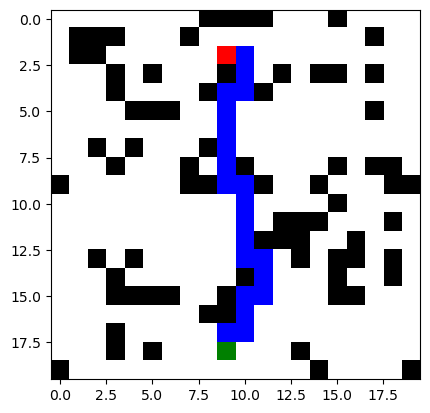

In [3]:
#Grassfire Iteration
cl=[node(start_x,start_y,0,0)] #Current list of fresh nodes (visited in previous iteration)
nl=[] #new list of nodes that will be created in current iteration
Path1=[] #To store the final path
while (not Found):
    if(len(cl)==0): #No new nodes can be created and 'Found' is False i.e., algorithm ends without finding a path
        print("No Path")
        break
    for x in cl:
        nl=x.expand(nl)
        if(Found):
            break
    cl=nl[:]
    nl=[]

nde = last
while nde.parent!=0:  #tracing the found path
    GRID1[nde.X,nde.Y] = 4
    Path1=[*Path1,[nde.X,nde.Y]] 
    nde = nde.parent

# Visualisation of the found path
norm = colors.BoundaryNorm(bounds,cmap.N)
fig, ax = plt.subplots()
ax.imshow(GRID1, cmap=cmap, norm=norm)
plt.show()

# A* ALGORITHM

In [4]:
#Node class (for A*)
nodes = [[0]*size for _ in range(size)] # for storing the node-objects corresponding to the grid cells
global Found, last, AS
Found = False
AS=[] # for animation
class nodeA:
    X = -1
    Y = -1
    G = np.inf # path length from 'start'
    F = np.inf # g + (Manhattan distance to the destination) = current minimum path length estimate through this node
    parent = 0
    def __init__(self,x,y,g,par):
        self.X = x
        self.Y = y
        self.G = g
        self.F = self.G + abs(self.X-end_x) + abs(self.Y-end_y) 
        self.parent=par
    def expand(self,nl):
        global Found, last, AS
        s=[-1,1,0,0]
        nn=[]
        for i in range(4):
               if(self.X+s[i]>=0 and self.X+s[i]<size and self.Y+s[3-i]>=0 and self.Y+s[3-i]<size): # out of map
                    if(self.X+s[i]==end_x and self.Y+s[3-i]==end_y):
                        Found=True
                        last=self
                        return nl
                    elif(GRID2[self.X+s[i]][self.Y+s[3-i]]==2 or GRID2[self.X+s[i]][self.Y+s[3-i]]==1): # 'start' or 'block' node
                        continue
                    elif(nodes[self.X+s[i]][self.Y+s[3-i]]==0 or (nodes[self.X+s[i]][self.Y+s[3-i]]).G > self.G+1):
                        # Neighbour node visited for the first time OR better length for the neighbour node via current node 
                        n=nodeA(self.X+s[i],self.Y+s[3-i],self.G+1,self)
                        if(nodes[self.X+s[i]][self.Y+s[3-i]]==0):
                            nn=[*nn,n]
                        nodes[self.X+s[i]][self.Y+s[3-i]] = n
                        if(len(nl)==0):
                            nl=[n]
                        else:
                            for i in range(len(nl)):
                                if(nl[i].F>n.F):
                                    nl.insert(i,n)
                                    break
                            if(nl[len(nl)-1].F<=n.F):
                                nl.insert(len(nl),n)
        if(len(nn)>0):
            AS=[*AS,nn[:]]
        return nl                     

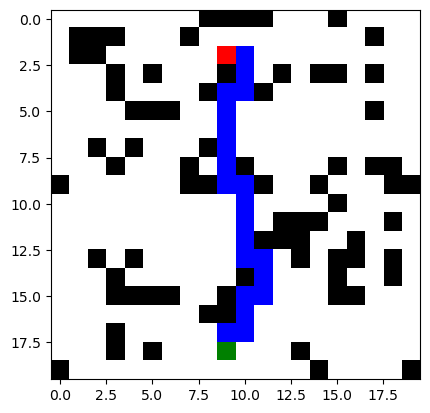

In [5]:
# A* Iterative procedure
cl = [nodeA(start_x,start_y,0,0)]
Path2=[] 
while (not Found):
    if(len(cl)==0):
        print("No Path")
        break
    c = cl.pop(0)
    cl = c.expand(cl)

nde = last
while nde.parent!=0:
    GRID2[nde.X,nde.Y] = 4
    Path2=[*Path2,[nde.X,nde.Y]]
    nde = nde.parent
#Path visualisation
fig1, ax1 = plt.subplots()
ax1.imshow(GRID2, cmap=cmap, norm=norm)
plt.show()

# ANIMATED VISUALISATION

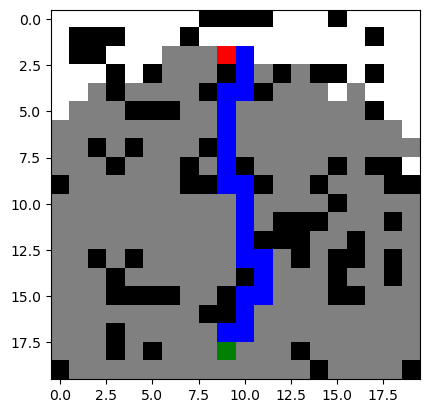

In [6]:
# for grassfire
from matplotlib.animation import PillowWriter
plt.clf()
plt.close()
fig=plt.figure()
writer = PillowWriter(fps=10) 
with writer.saving(fig,"Grassfire.gif",100): #ANIMATED GIF FILE WILL BE STORED WITH THE NAME GIVEN HERE AS INPUT
    for x in GF:
        for i in x:
            GRID3[i.X][i.Y]=5
        fig = plt.imshow(GRID3, cmap=cmap, norm=norm)
        writer.grab_frame()
    for j in Path1:
        GRID3[*j] = 4
    fig = plt.imshow(GRID3, cmap=cmap, norm=norm)
    writer.grab_frame()

#LAST FRAME OF THE GRASSFIRE ANIMATION WILL BE DISPLAYED AFTER RUNNING THIS PART

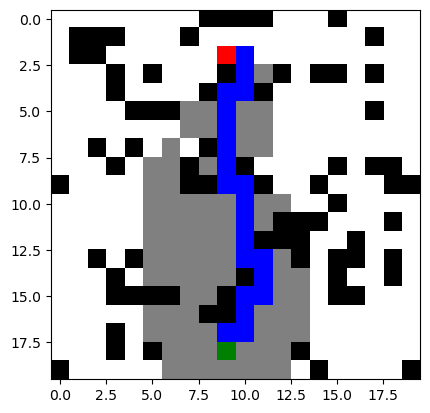

In [7]:
# for A*
plt.clf()
plt.close()
f1=plt.figure()
writer2 = PillowWriter(fps=10)
with writer2.saving(f1,"AStar.gif",100):#ANIMATED GIF FILE WILL BE STORED WITH THE NAME GIVEN HERE AS INPUT
    for x in AS:
        for i in x:
            GRID4[i.X][i.Y]=5
        f1 = plt.imshow(GRID4, cmap=cmap, norm=norm)
        writer2.grab_frame()
    for j in Path2:
        GRID4[*j] = 4
    f1 = plt.imshow(GRID4, cmap=cmap, norm=norm)
    writer2.grab_frame()
#LAST FRAME OF THE A* ANIMATION WILL BE DISPLAYED AFTER RUNNING THIS PART